<div style="text-align: center; font-size:x-large;">기계학습 과제 1</div>

<div style="text-align: center; font-size:large;">2024. 9</div>

### 개요

<div style="margin-left:10px">&nbsp; python의 sklearn 모듈와 statsmodels을 이용하여 데이터를 분석하고, 시각화가 필요한 경우에는 plotly를 이용하였다. 사용할 패키지와 데이터 불러오기 등 분석에 필요한 사전 작업을 아래에 기술하였다. 분석에 필요한 $\text{College}$ 데이터의 경우 이름이 지어지지 않은 첫 번째 열은 유일성을 지니는 대학 이름이므로, 설명변수에 적합하지 않다고 판단하여 제거하였다. 또한, 두 개의 범주를 가진 Private 열의 경우, statsmodels에서 모형을 적합시키기 위해 Yes를 1로 하는 정수형 자료로 재표현하여 분석하였다. </div>

In [75]:
## basic modules
import pandas as pd
import numpy as np
import itertools
import scipy.stats
import warnings

## model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## Visualization
import plotly.io as pio
import plotly.express as px

## plotly backend
pd.options.plotting.backend = 'plotly'
pio.templates.default = 'plotly_white'
pio.renderers.default = "vscode"

## Data preprocessing
College = pd.read_csv("/root/ML2024/data/Data/College.csv", index_col=0)\
.reset_index(drop = True)\
.assign(Private = lambda _df : _df.Private.map(lambda x : 1 if x == "Yes" else 0))

## ignore warnings
warnings.filterwarnings('ignore')

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

### 문제

#### 1. 데이터 $\text{Colleage}$를 찾아서 다음을 수행하시오.(아래 각 문항 당 1.25점)

---

<div style="margin-left:30px;text-indent:-20px">(a) $\text{Grad.rate}$를 반응변수로 범주형을 제외한 나머지 변수들을 설명변수로 하여 선형회귀분석을 시행하고 그 분산분석표를 보여주시오.</div>

&nbsp; `Grad.Rate`를 반응변수 데이터프레임 `y`, 범주형 변수 `Private`와 반응변수열을 제외한 설명변수 데이터프레임 `X`를 생성하고, 선형회귀모형을 구성하였다. 이후, 회귀계수의 유의성 검정을 위해 분산분석표를 산출하였다.

In [68]:
## Features and Target generating
y = College["Grad.Rate"]
X = pd.concat([pd.DataFrame({'intercept' : np.ones(College.shape[0])}),\
               College.drop(["Grad.Rate", "Private"], axis = 1)], axis = 1)

## Linear Regression Model Fitting
model = sm.OLS(y, X)
results = model.fit()

print(results.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      37.0418      4.589      8.072      0.000      28.033      46.051
Apps            0.0012      0.000      2.710      0.007       0.000       0.002
Accept         -0.0006      0.001     -0.644      0.520      -0.002       0.001
Enroll          0.0021      0.002      0.923      0.356      -0.002       0.007
Top10perc       0.0626      0.072      0.872      0.384      -0.078       0.204
Top25perc       0.1352      0.055      2.454      0.014       0.027       0.243
F.Undergrad    -0.0006      0.000     -1.438      0.151      -0.001       0.000
P.Undergrad    -0.0015      0.000     -3.901      0.000      -0.002      -0.001
Outstate        0.0012      0.000      5.307      0.000       0.001       0.002
Room.Board      0.0020      0.001      3.485      0.001       0.001       0.003
Books          -0.0020      0.003     -0

---

<div style="margin-left:30px;text-indent:-20px">(b) 위의 결과 중 유의한(유의확률 $0.05$) 변수들을 나열하시오.</div>

> &nbsp; 회귀계수 표에서 기재된 순서대로 `Apps`, `Top25perc`, `P.Undergrad`, `Outstate`, `Room.Board`, `Personal`, `perc.alumni`, `Expend`의 총 $8$개 설명변수가 유의수준 $\alpha = 0.05$에서 통계적으로 유의했다.

---

<div style="margin-left:30px;text-indent:-20px">(c) $\hat y_i$를 구해서 이를 이용해 $R^2$를 계산하고, 모형에 대한 유의성 검정 결과를 서술하시오.</div>

&nbsp; 모형에서 적합된 값을 이용해 결정계수를 계산하고, 유의성을 검정하였다. 산출할 값들은 모두 소수점 4자리까지 반올림하여 출력하였다.

In [69]:
## yhat 구하기
train_fitted = results.get_prediction(X)
yhat = train_fitted.predicted_mean

## R-squares 값 계산하기
RSS = np.sum((y - yhat)**2)
TSS = np.sum((y - np.mean(y))**2)
R_sq = 1-RSS/TSS

print(f"R-squares = {R_sq:.4f}")

## 모형에 대한 유의성 검정(F-test)
p = X.shape[1]-1 ## except intercept column
n = X.shape[0]
F = ((TSS-RSS)/p)/(RSS/(n-p-1))
f_dist = scipy.stats.f(p, n-p-1)
print(f"\n임계값 c = {f_dist.ppf(0.95):.4f}")
print(f"F-value = {F:.4f}")
print(f"Pr(>F) = {1-f_dist.cdf(F):.4f}")

R-squares = 0.4587

임계값 c = 1.6568
F-value = 40.2553
Pr(>F) = 0.0000


&nbsp; $R^2$의 값은 $0.4587$였고, 이후 해당 모형에 대한 유의성을 F-test를 이용하여 검정하였다.

`-` 가설 설정 $$H_0 : \beta_1 = \beta_2 = \cdots = \beta_{16} ~ vs. ~ H_1 : ￢ ~ H_0$$

`-` 검정통계량 $$F = \frac{(TSS - RSS)/16}{RSS/(759)} \underset{H_0}{\sim} F(16, 759)$$

`-` 검정 결과

> &nbsp; 검정통계량의 관측치는 $40.2553$였고, 해당 관측치의 p-value가 충분히 작아$(p < 0.001)$ 해당 모형은 유의수준 $\alpha = 0.05$에서 통계적으로 유의함을 알 수 있었다.

---

<div style="margin-left:30px;text-indent:-20px">(d) 잔차도를 그리되 가로축은 예측값, 세로축은 잔차로 해서 그리시오.</div>

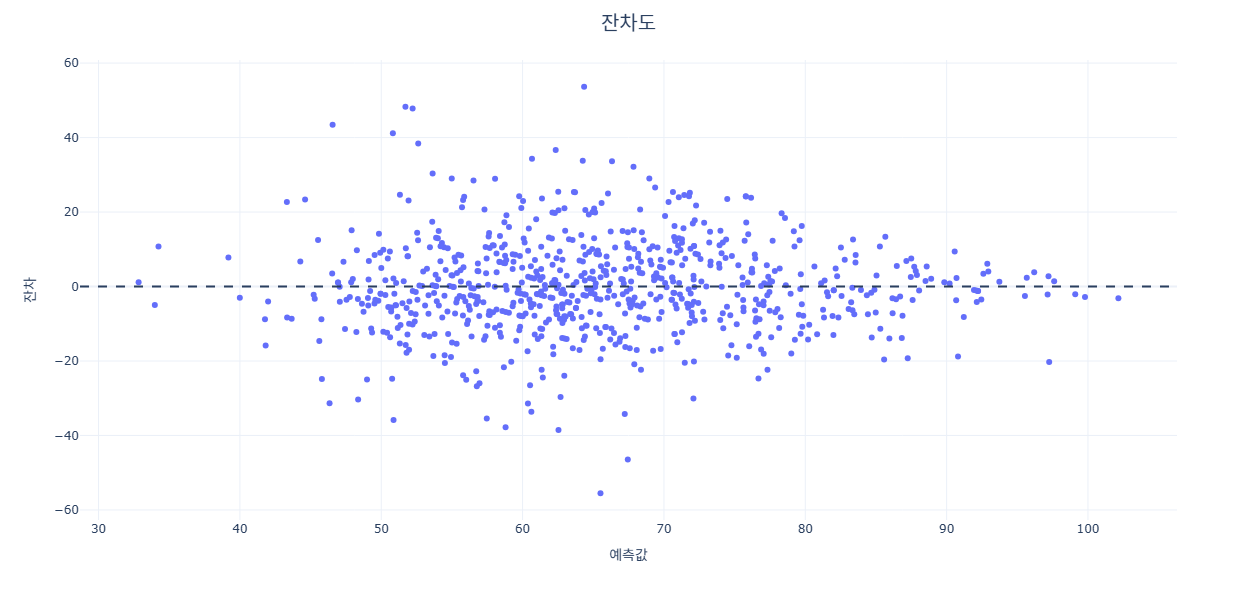

In [78]:
## 잔차값
ehat = y - yhat

## 잔차도
tidy = pd.DataFrame({"yhat" : yhat, "ehat" : ehat})
fig = tidy.plot.scatter(x = 'yhat', y = 'ehat', width = 900, height = 600)
fig.add_hline(0, line_dash = "dash")
fig.update_layout(
    title = "잔차도", title_x = 0.5, title_font_size = 20,
    xaxis_title="예측값",
    yaxis_title="잔차"
)
fig.show()

> &nbsp; 잔차도의 모양이 0을 중심으로 대칭이고, 이분산성 또한 육안으로 확인되지 않았다. 독립성이나 정규성은 알 수 없으나, 전체적으로 해당 모형은 회귀모형의 기본 가정을 위배하지 않을 것이라 기대할 수 있다.

---

<div style="margin-left:30px;text-indent:-20px">(e) 데이터를 두 개로 쪼개되 랜덤하게 쪼개지 않고 위로부터 $500$개 까지의 데이터와 $501$번째부터 끝까지의 데이터로 훈련 데이터 및 평가 데이터를 만들어 앞의 $10$개씩 출력해서 보여주시오.</div>

&nbsp; 범주형 변수 `Private`를 제외한 뒤, 훈련 데이터와 평가 데이터를 각각 `df_train`, `df_test`로 할당한 후, 순서대로 출력하였다.

In [87]:
## data selection
df_train = College.drop("Private", axis = 1).iloc[:500]
df_test = College.drop("Private", axis = 1).iloc[500:]

## display
print(df_train.head(10))
print(df_test.head(10))

   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   
5   587     479     158         38         62          678           41   
6   353     340     103         17         45          416          230   
7  1899    1720     489         37         68         1594           32   
8  1038     839     227         30         63          973          306   
9   582     498     172         21         44          799           78   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750    

---

<div style="margin-left:30px;text-indent:-20px">(f) 훈련 데이터를 이용해서 회귀계수를 추정하고 이로부터 평가 데이터에서의 $\hat y_i$들을 히스토그램으로 보여주시오.</div>

&nbsp; 문제에 제시된 조건에 맞는 반응변수와 설명변수 데이터프레임을 각각 생성하고, 선형회귀모형을 구성하였다. 회귀계수 추정치와 평가 데이터 예측값의 히스토그램을 순서대로 산출하였다.

       Features  Coefficients
0     Intercept     27.241785
1          Apps      0.001264
2        Accept     -0.001100
3        Enroll      0.004348
4     Top10perc     -0.005245
5     Top25perc      0.220197
6   F.Undergrad     -0.000957
7   P.Undergrad     -0.001481
8      Outstate      0.001052
9    Room.Board      0.003287
10        Books     -0.002258
11     Personal     -0.000095
12          PhD      0.029264
13     Terminal     -0.014755
14    S.F.Ratio      0.068092
15  perc.alumni      0.286109
16       Expend     -0.000652




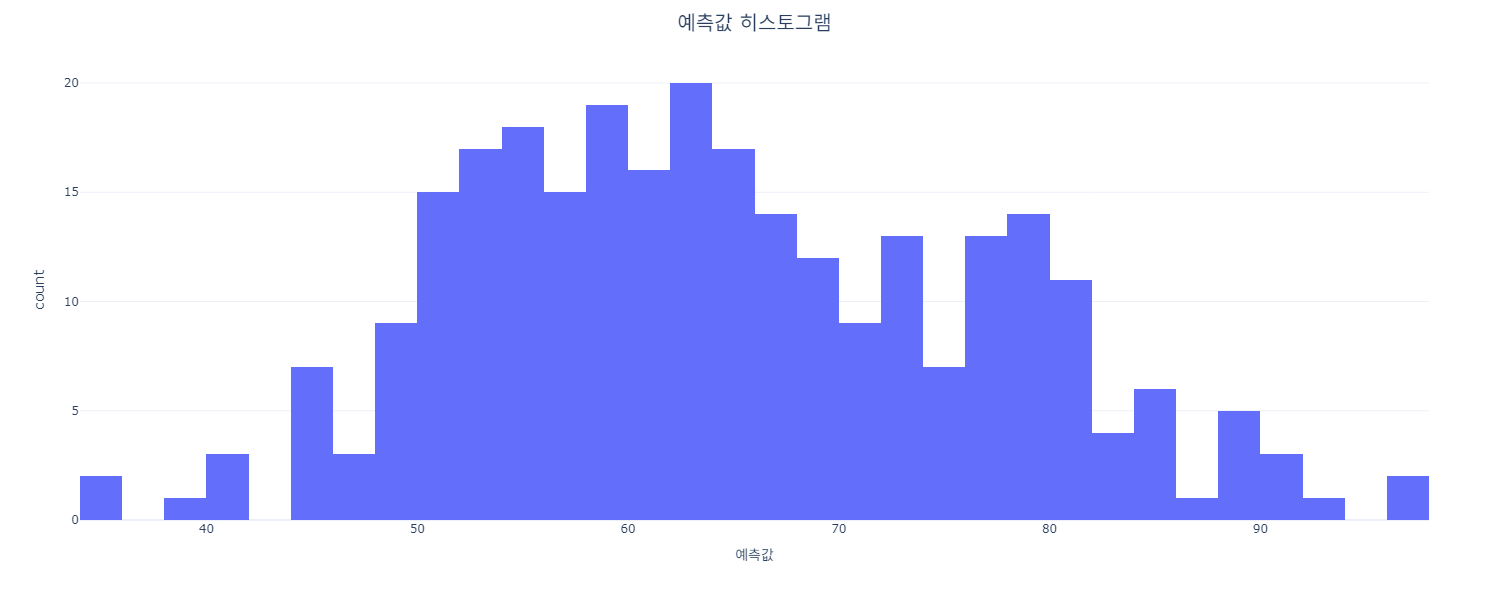

In [80]:
## train dataset : (y, X)
y = df_train["Grad.Rate"]
X = df_train.drop("Grad.Rate", axis = 1)

## test dataset : (yy, XX)
yy = df_test["Grad.Rate"]
XX = df_test.drop("Grad.Rate", axis = 1)

## modeling
predictr = LinearRegression()
predictr.fit(X, y)
yhat = predictr.predict(X) ## train data에서의 적합값
yyhat = predictr.predict(XX) ## test data에서의 예측값

## output coefficient
print(pd.DataFrame({'Features' : ["Intercept"]+list(X.columns),\
                    'Coefficients' : [predictr.intercept_] + list(predictr.coef_)}))
print("\n")

## histogram
fig = px.histogram(yyhat, nbins = 40,  width = 900, height = 600)
fig.update_layout(
    title = "예측값 히스토그램", title_x = 0.5, title_font_size = 20,
    xaxis_title="예측값",
    showlegend = False
)
fig.show()

---

<div style="margin-left:30px;text-indent:-20px">(g) 위에서 계산한 값을 이용해서 평가 데이터에서 $R^2$를 계산하고, 훈련 데이터에서의 $R^2$와 비교하시오.</div>

&nbsp; 구성된 모형을 이용하여 각 데이터에서의 $R^2$를 계산하고, 그 값을 소수점 4자리까지 반올림하여 출력하였다.

In [81]:
## 훈련 데이터에서의 R-squared
RSS_train = np.sum((y - yhat)**2)
TSS_train = np.sum((y - np.mean(y))**2)
R_sq_train = 1-RSS_train/TSS_train

print(f"훈련 데이터에서의 R-squares = {R_sq_train:.4f}")

## 평가 데이터에서 계산한 R-squared
RSS_test = np.sum((yy - yyhat)**2)
TSS_test = np.sum((yy - np.mean(yy))**2)
R_sq_test = 1-RSS_test/TSS_test

print(f"평가 데이터에서의 R-squares = {R_sq_test:.4f}")

훈련 데이터에서의 R-squares = 0.4387
평가 데이터에서의 R-squares = 0.4587


> &nbsp; 평가 데이터에서의 $R^2$값이 훈련 데이터에서의 $R^2$보다 더 컸지만, 유사한 수준으로 나타났다. 이에 따라 모형은 과적합되지 않았다고 판단할 수 있다.

---

<div style="margin-left:30px;text-indent:-20px">(h) 훈련 데이터에서 얻은 회귀계수로 평가 데이터 $\underset{i=1}{\overset{n_{ts}}{\sum}}(y_i - \hat y_i)^2/n_{ts}$와 훈련 데이터 $\underset{i=1}{\overset{N_{tr}}{\sum}}(y_i - \hat y_i)^2/N_{tr}$를 계산하고 이 둘을 비교하시오.</div>

&nbsp; 훈련 데이터에서 얻은 모형으로 평가 데이터와 훈련 데이터에서의 모형 평가 지표를 소수점 3자리까지 반올림하여 산출하였다.

In [82]:
## Train MSE
print(f"훈련 데이터 지표 : {RSS_train/X.shape[0]:.3f}")

## Test MSE
print(f"평가 데이터 지표 : {RSS_test/XX.shape[0]:.3f}")

훈련 데이터 지표 : 165.026
평가 데이터 지표 : 159.088


> &nbsp; 평가 데이터에서의 MSE가 훈련 데이터보다 더 작았다. 모형은 과적합되지 않았으며, 평가 데이터에서의 MSE가 더 작은 것은 모형의 MSE가 높고, 평가 데이터의 수가 작기 때문에 발생할 수 있는 현상이다.

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

#### 2. 데이터 $\text{Colleage}$를 찾아서 다음을 수행하시오.

&nbsp; 해당 문제의 하위 문제들을 해결하기 위해 아래와 같은 함수를 먼저 선언하였다.

In [83]:
## Mallow's Cp 산출 함수
def calculate_mallows_cp(X, y, RSS, sigma_squared):
    n = len(y)
    p = X.shape[1]  # Number of Features for model
    Cp = RSS/sigma_squared - (n-2*p)
    return Cp

## 선택 변수 개수에 따른 모든 변수 조합 및 Mallow's Cp값 산출 함수
def Cp_Features_Combinations(X, y, p = None, s = None):
    """
    X : Features(pandas dataframe)
    y : Target(pandas series)
    p : 최대 선택 변수 개수
    s : 최소 선택 변수 개수
    """
    if p == None :
        p = X.shape[1]
    if s == None :
        s = 1
    
    n = len(y)
    n_features = X.shape[1]
    
    ## full model로 sigma squared 예측값 산출
    predictr = LinearRegression()
    predictr.fit(X, y)
    yhat = predictr.predict(X)
    sigma_squared = np.sum((y - yhat)**2)/(n-n_features-1)
    
    Cps = []
    Num_Features = []
    Combinations = []

    ## 선택 변수 개수에 따른 가능한 모든 조합 산출
    for k in range(s, p + 1):
        for subset in itertools.combinations(range(n_features), k):
            X_subset = X.iloc[:, list(subset)]
            model = LinearRegression()
            model.fit(X_subset, y)
            yhat_sub = model.predict(X_subset)
            RSS = np.sum((y - yhat_sub) ** 2)
            Cps.append(calculate_mallows_cp(X_subset, y, RSS, sigma_squared))
            Num_Features.append(k)
            Combinations.append(list(X.columns[list(subset)]))

    return Cps, Num_Features, Combinations

---

<div style="margin-left:30px;text-indent:-20px">(a) 모든 데이터를 훈련 데이터로 하여, $\text{Grad.rate}$를 반응변수로 하고 범주형을 제외한 나머지 변수들 중 하나의 변수만 예측변수로 한 경우들에 대해서 $\text{Mallow's} ~ C_p$를 구하시오. (3점)</div>

&nbsp; 범주형 설명변수 `Private`를 제외한 나머지 설명변수들로 각각 선형회귀모형을 구성한 뒤, 각 모형 별 $\text{Mallow's} ~ C_p$를 산출하였다.

In [84]:
y = College["Grad.Rate"]
X = College.drop(["Grad.Rate", "Private"], axis = 1)

Cps, Num_Features, Combinations = Cp_Features_Combinations(X, y, 1, 1)
df_cp = pd.DataFrame({"Features" : Combinations, "Cp" : Cps})
df_cp = df_cp.assign(Features = lambda _df : _df.Features.map(lambda x : x.pop()))
df_cp

,Features,Cp
0,Apps,598.845458
1,Accept,622.723236
2,Enroll,628.384307
3,Top10perc,285.064125
4,Top25perc,309.238304
5,F.Undergrad,620.372479
6,P.Undergrad,536.345984
7,Outstate,170.830793
8,Room.Board,375.542006
9,Books,629.083536


> &nbsp; 모형 별 $\text{Mallow's} ~ C_p$를 산출한 결과, `Outstate`만 설명변수로 사용한 모형의 $C_p$값이 가장 작기 때문에 해당 모형이 설명변수가 하나인 모형들 중 가장 좋은 모형이라고 말할 수 있다.

---

<div style="margin-left:30px;text-indent:-20px">(b) 위에서 고려한 예측 변수들의 조합에($\text{All Subset}$) 대해서 $\text{Mallow's} ~ C_p$를($\text{Grad.Rate}$는 반응변수) 구하고 변수들의 개수를 $x$축으로 하여 산점도를 그리시오. (3점)</div>

In [85]:
## 가능한 모든 조합(2**16-1) 산출
Cps, Num_Features, Combinations = Cp_Features_Combinations(X, y)

In [86]:
## Full model
predictr = LinearRegression()
predictr.fit(X, y)
yhat = predictr.predict(X)

## estimate sigma squared
n = len(y)
n_features = X.shape[1]
sigma_sq = np.sum((y - yhat)**2)/(n-n_features-1)

## Null model Cp 추가(총 2**16개의 모형)
Null_RSS = np.sum((y - np.mean(y))**2)
Null_Cp = Null_RSS/sigma_sq - (len(y)-0*2)
tidy = pd.concat([pd.DataFrame({"Number of Features" : [0], "Cp" : [Null_Cp]}),
                  pd.DataFrame({"Number of Features" : Num_Features, "Cp" : Cps})], 
                 axis = 0).assign(Minimum = lambda _df : _df.Cp == min(Cps))
fig = tidy.plot.scatter(x = "Number of Features", y = "Cp", opacity = 0.1,
                        color = "Minimum", width = 900, height = 600)
fig.update_layout(
    title = "변수 개수에 따른 Cp값 산점도", title_x = 0.5, title_font_size = 20,
    xaxis_title="변수 개수"
)
fig.data[1]['marker']['opacity'] = 1.0
fig.show()

print(f"\nMallow's Cp값이 최소가 되는 모형의 설명변수 : \
{Combinations[int(np.where(Cps == min(Cps))[0])]}")


Mallow's Cp값이 최소가 되는 모형의 설명변수 : ['Apps', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Personal', 'perc.alumni', 'Expend']


> &nbsp; 설명변수의 개수가 많아질수록 $C_p$의 값이 평균적으로 감소하는 모습을 볼 수 있었다. 또한, $C_p$값이 최소가 되는 모형은 설명변수 개수가 $9$개일 때 나타났음을 확인할 수 있었다.

---

<div style="margin-left:30px;text-indent:-20px">(c) 위에서 고려한 예측 변수들에 $\text{Apps}$를 포함한 교호작용들 중 하나를 추가하려고 한다. $\text{Mallow's} ~ C_p$ 기준으로 해서 어떤 교호작용을 추가하는 것이 바람직한가? (4점)</div>

&nbsp; 범주형 설명변수 `Private`를 제외한 모든 예측 변수을 포함한 모형에서 교호작용 항의 조합들을 추가하는 방식으로 분석을 진행하였다. 교호작용을 고려함으로써 Full model에도 해당 변수들을 추가하여 오차분산의 예측치를 새로 산출하였다.

In [64]:
## Full model
Full_X = pd.concat([X], axis = 1)
for i in range(n_features-1) :
    Full_X = Full_X.assign(Interaction = X.Apps*other_features.iloc[:, i])\
    .rename({"Interaction":"Apps*"+(other_features.columns[i])}, axis = 1)
predictr = LinearRegression()
predictr.fit(Full_X, y)
yhat = predictr.predict(Full_X)

## estimate sigma squared
n = len(y)
Full_features = Full_X.shape[1]
sigma_sq = np.sum((y - yhat)**2)/(n-Full_features-1)

other_features = X.drop("Apps", axis = 1)
n_features = X.shape[1]

## outputs
Cps = [0.0]*(n_features-1)
Interaction_term = [""]*(n_features-1)

for i in range(n_features-1) :
    ## make interaction term
    X_tmp = X.assign(Interaction = X[["Apps", other_features.columns[i]]]\
                     .assign(Interaction = lambda _df : _df.Apps*_df.iloc[:, 1])\
                     .Interaction)

    ## modeling
    predictr = LinearRegression()
    predictr.fit(X_tmp, y)
    yhat = predictr.predict(X_tmp)
    
    RSS = np.sum((y - yhat)**2)

    Cps[i] = calculate_mallows_cp(X_tmp, y, RSS, sigma_sq)
    Interaction_term[i] = "Apps*"+other_features.columns[i]

pd.DataFrame({"Interaction term" : Interaction_term, "Cp" : Cps})

,Interaction term,Cp
0,Apps*Accept,27.082170
1,Apps*Enroll,30.728201
2,Apps*Top10perc,36.033923
3,Apps*Top25perc,33.618753
4,Apps*F.Undergrad,29.811254
5,Apps*P.Undergrad,31.439392
6,Apps*Outstate,36.206668
7,Apps*Room.Board,28.570471
8,Apps*Books,32.379908
9,Apps*Personal,34.411482


> &nbsp; 고려된 모형 중 `Apps`와 `Accept`간 교호작용을 포함한 모형의 $C_p$값이 가장 작았다. 따라서 $\text{Mallow's}~C_p$를 기준으로 `Apps`와 `Accept`간 교호작용을 추가하는 것이 가장 바람직하다.